# **Разведочный анализ данных (EDA)**

### Был выбран датасет №9 Т-Банк: поездки на самокатах

In [135]:
# Импорт данных и выбор стиля графиков

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn-v0_8')

df = pd.read_csv("https://dano.hse.ru/mirror/pubs/share/987942268.csv")
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [136]:
# Типы даннных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [137]:
df_example = df.sample(20, random_state=53).tail(10).copy(deep=True)
df_example

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
63445,269887499,529363589,F,27,NaN,NaN,Г МОСКВА,7.49,50.0,300.0,SL,1.674331,2024-08-21 19:28:37.000000,2024-08-21 19:28:40.043111,2024-08-21 19:33:35.317564,3,2024-08-21 19:28:40.043111,87.45,25.00,NaN
39000,314900241,772703130,M,40,NaN,NaN,Г МОСКВА,9.03,50.0,300.0,SL,1.182648,2024-09-13 16:23:56.000000,2024-09-13 16:24:00.668000,2024-09-13 16:29:06.471775,3,2024-09-13 16:24:00.668000,104.18,20.84,NaN
380809,265813081,158699796,M,35,GRD,MAR,ОБЛ МОСКОВСКАЯ,9.39,50.0,300.0,SL,0.731509,2024-08-06 06:02:43.000000,2024-08-06 06:02:46.972638,2024-08-06 06:07:12.102919,3,2024-08-06 06:02:46.972638,96.95,19.39,NaN
234922,271768380,368598103,F,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,2.084904,2024-08-28 08:45:03.000000,2024-08-28 08:45:08.633383,2024-08-28 08:56:01.200178,5,2024-08-28 10:45:08.633383,95.89,28.77,NaN
27469,273013111,266478959,M,31,GRD,UNM,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,E,4.167847,2024-09-01 13:59:31.000000,2024-09-01 13:59:37.190988,2024-09-01 14:31:18.868090,5,2024-09-01 15:59:37.190988,237.68,59.00,NaN
70905,353722254,509152354,M,22,GRD,MAR,Г МОСКВА,9.27,50.0,300.0,SL,0.865870,2024-10-12 09:17:02.000000,2024-10-12 09:17:07.018000,2024-10-12 09:35:31.982285,3,2024-10-12 09:17:07.018000,226.13,146.46,NaN
50284,314899270,630253112,F,24,NaN,NaN,Г МОСКВА,9.99,50.0,300.0,E,1.494410,2024-09-13 04:37:24.000000,2024-09-13 04:37:27.932000,2024-09-13 04:42:43.213271,3,2024-09-13 04:37:27.932000,109.94,27.00,NaN
109784,255493454,427414917,M,26,UGR,UNM,ЧЕЛЯБИНСКАЯ ОБЛ,6.49,30.0,300.0,E,0.989700,2024-06-28 18:12:53.000000,2024-06-28 18:12:56.610282,2024-06-28 18:20:42.871664,5,2024-06-28 20:12:56.610282,81.92,8.19,NaN
48463,269621620,795962472,M,33,SCH,CIV,МОСКОВСКАЯ ОБЛ,6.99,40.0,300.0,ES200,0.076679,2024-08-20 08:16:19.000000,2024-08-20 08:16:24.221726,2024-08-20 08:17:10.140172,3,2024-08-20 08:16:24.221726,0.00,NaN,NaN
304955,332645235,376108945,M,30,NaN,NaN,Г МОСКВА,7.99,50.0,300.0,SL,1.895310,2024-09-15 10:03:59.000000,2024-09-15 10:04:03.726000,2024-09-15 10:08:40.597555,3,2024-09-15 10:04:03.726000,89.95,17.99,NaN


In [138]:
# Как можно замететь на данных сверху столбец lvn_state_nm включает в себя некоторые дубли, например, "ОБЛ МОСКОВСКАЯ" и "МОСКОВСКАЯ ОБЛ".
# Было принято решение составить список и переименовать одинаковые названия, записанные в разном порядке или разным шрифтом.
# Далее оказалось, что существует огромное количество по-разному написанных мест проживаний, для составления списка была использована ИИ



df_lvn_state_nm = df['lvn_state_nm'].copy()
# Полный словарь синонимов для всех регионов с сохранением оригинальных названий
region_synonyms = {
    # Российские регионы
    "МОСКВА": ["Г МОСКВА", "ГОРОД МОСКВА", "МОСКВА Г", "Г. МОСКВА", "МОСКВА Г.", "МО ЗАПАД", "ПОСЕЛЕНИЕ СОСЕНСКОЕ"],
    "САНКТ-ПЕТЕРБУРГ": ["Г САНКТ-ПЕТЕРБУРГ", "САНКТ-ПЕТЕРБУРГ Г", "Г. САНКТ-ПЕТЕРБУРГ", "САНКТ-ПЕТЕРБУРГ Г.", "ГОРОД САНКТ-ПЕТЕРБУРГ"],
    "МОСКОВСКАЯ ОБЛАСТЬ": ["МОСКОВСКАЯ ОБЛ", "ОБЛ МОСКОВСКАЯ", "МОСКОВСКАЯ", "ОБЛ. МОСКОВСКАЯ", "МОСКОВСКАЯ ОБЛ.", "МОСККОВСКАЯ"],
    "ТЮМЕНСКАЯ ОБЛАСТЬ": ["ТЮМЕНСКАЯ ОБЛ", "ОБЛ ТЮМЕНСКАЯ", "ОБЛАСТЬ ТЮМЕНСКАЯ"],
    "РОСТОВСКАЯ ОБЛАСТЬ": ["РОСТОВСКАЯ ОБЛ", "ОБЛ РОСТОВСКАЯ", "ОБЛАСТЬ РОСТОВСКАЯ"],
    "СВЕРДЛОВСКАЯ ОБЛАСТЬ": ["СВЕРДЛОВСКАЯ ОБЛ", "ОБЛ СВЕРДЛОВСКАЯ", "ОБЛ. СВЕРДЛОВСКАЯ", "СВЕРДЛОВСКАЯ"],
    "РЕСПУБЛИКА ТАТАРСТАН": ["РЕСП ТАТАРСТАН", "ТАТАРСТАН", "ТАТАРСТАН РЕСП", "РУСП ТАТАРСТАН", "РЕСП. ТАТАРСТАН", "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"],
    "НОВОСИБИРСКАЯ ОБЛАСТЬ": ["НОВОСИБИРСКАЯ ОБЛ", "НОВОСИБИРСКАЯ", "ОБЛ НОВОСИБИРСКАЯ"],
    "ЧЕЛЯБИНСКАЯ ОБЛАСТЬ": ["ЧЕЛЯБИНСКАЯ ОБЛ", "ЧЕЛЯБИНСКАЯ ОБЛ.", "ОБЛ ЧЕЛЯБИНСКАЯ"],
    "НИЖЕГОРОДСКАЯ ОБЛАСТЬ": ["НИЖЕГОРОДСКАЯ ОБЛ", "НИЖЕГОРОДСКАЯ", "ОБЛ НИЖЕГОРОДСКАЯ"],
    "КРАСНОДАРСКИЙ КРАЙ": ["КРАСНОДАРСКИЙ КРАЙ", "КРАЙ КРАСНОДАРСКИЙ"],
    "КЕМЕРОВСКАЯ ОБЛАСТЬ": ["КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС", "КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ", "КЕМЕРОВСКАЯ ОБЛ"],
    "КРАСНОЯРСКИЙ КРАЙ": ["КРАСНОЯРСКИЙ КРАЙ", "КРАЙ КРАСНОЯРСКИЙ"],
    "СМОЛЕНСКАЯ ОБЛАСТЬ": ["СМОЛЕНСКАЯ ОБЛ", "ОБЛ СМОЛЕНСКАЯ"],
    "ИРКУТСКАЯ ОБЛАСТЬ": ["ИРКУТСКАЯ ОБЛ", "ОБЛ ИРКУТСКАЯ"],
    "ОРЛОВСКАя ОБЛАСТЬ": ["ОРЛОВСКАЯ ОБЛ", "ОБЛ ОРЛОВСКАЯ"],
    "РЕСПУБЛИКА БАШКОРТОСТАН": ["РЕСП БАШКОРТОСТАН", "БАШКОРТОСТАН РЕСП"],
    "ПСКОВСКАЯ ОБЛАСТЬ": ["ПСКОВСКАЯ ОБЛ", "ОБЛ ПСКОВСКАЯ"],
    "ВОЛОГОДСКАЯ ОБЛАСТЬ": ["ВОЛОГОДСКАЯ ОБЛ", "ОБЛ ВОЛОГОДСКАЯ"],
    "РЕСПУБЛИКА МАРИЙ ЭЛ": ["РЕСП МАРИЙ ЭЛ", "РЕСПУБЛИКА МАРИЙ ЭЛ"],
    "ВОРОНЕЖСКАЯ ОБЛАСТЬ": ["ВОРОНЕЖСКАЯ ОБЛ", "ОБЛ ВОРОНЕЖСКАЯ"],
    "САМАРСКАЯ ОБЛАСТЬ": ["САМАРСКАЯ ОБЛ", "ОБЛ САМАРСКАЯ", "Г САМАРА", "ОБЛАСТЬ САМАРСКАЯ"],
    "АСТРАХАНСКАЯ ОБЛАСТЬ": ["АСТРАХАНСКАЯ ОБЛ", "ОБЛ АСТРАХАНСКАЯ"],
    "БЕЛГОРОДСКАЯ ОБЛАСТЬ": ["БЕЛГОРОДСКАЯ ОБЛ", "ОБЛ БЕЛГОРОДСКАЯ"],
    "АЛТАЙСКИЙ КРАЙ": ["АЛТАЙСКИЙ КРАЙ", "КРАЙ АЛТАЙСКИЙ"],
    "ЛИПЕЦКАЯ ОБЛАСТЬ": ["ЛИПЕЦКАЯ ОБЛ", "ОБЛ ЛИПЕЦКАЯ"],
    "САРАТОВСКАЯ ОБЛАСТЬ": ["САРАТОВСКАЯ ОБЛ", "ОБЛ САРАТОВСКАЯ"],
    "ЛЕНИНГРАДСКАЯ ОБЛАСТЬ": ["ЛЕНИНГРАДСКАЯ ОБЛ", "ОБЛ ЛЕНИНГРАДСКАЯ", "ОБЛ. ЛЕНИНГРАДСКАЯ", "ЛЕНЕНГРАДСКАЯ ОБЛ", "ОБЛАСТЬ ЛЕНИНГРАДСКАЯ"],
    "ПЕРМСКИЙ КРАЙ": ["ПЕРМСКИЙ КРАЙ", "КРАЙ ПЕРМСКИЙ"],
    "САХАЛИНСКАЯ ОБЛАСТЬ": ["САХАЛИНСКАЯ ОБЛ", "ОБЛ САХАЛИНСКАЯ"],
    "УДМУРТСКАЯ РЕСПУБЛИКА": ["РЕСП УДМУРТСКАЯ", "УДМУРТСКАЯ РЕСП", "УДМУРТСКАЯ"],
    "РЕСПУБЛИКА КРЫМ": ["РЕСП КРЫМ", "Г СЕВАСТОПОЛЬ"],
    "КАЛИНИНГРАДСКАЯ ОБЛАСТЬ": ["КАЛИНИНГРАДСКАЯ ОБЛ", "ОБЛ КАЛИНИнГРАДСКАЯ"],
    "ТВЕРСКАЯ ОБЛАСТЬ": ["ТВЕРСКАЯ ОБЛ", "ОБЛ ТВЕРСКАЯ"],
    "СТАВРОПОЛЬСКИЙ КРАЙ": ["СТАВРОПОЛЬСКИЙ КРАЙ", "КРАЙ СТАВРОПОЛЬСКИЙ"],
    "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ": ["РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ"],
    "ИВАНОВСКАЯ ОБЛАСТЬ": ["ИВАНОВСКАЯ ОБЛ", "ОБЛ ИВАНОВСКАЯ"],
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА": ["ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО", "АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА", "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ"],
    "ПРИМОРСКИЙ КРАЙ": ["ПРИМОРСКИЙ КРАЙ", "КРАЙ ПРИМОРСКИЙ"],
    "ВОЛГОГРАДСКАЯ ОБЛАСТЬ": ["ВОЛГОГРАДСКАЯ ОБЛ", "ОБЛ ВОЛГОГРАДСКАЯ", "ОБЛАСТЬ ВОЛГОГРАДСКАЯ"],
    "ТОМСКАЯ ОБЛАСТЬ": ["ТОМСКАЯ ОБЛ", "ОБЛ ТОМСКАЯ"],
    "РЕСПУБЛИКА ЧЕЧНЯ": ["РЕСП ЧЕЧЕНСКАЯ"],
    "РЕСПУБЛИКА БУРЯТИЯ": ["РЕСП БУРЯТИЯ"],
    "РЕСПУБЛИКА ДАГЕСТАН": ["РЕСП ДАГЕСТАН"],
    "КУРГАНСКАЯ ОБЛАСТЬ": ["КУРГАНСКАЯ ОБЛ", "ОБЛ КУРГАНСКАЯ"],
    "КАБАРДИНО-БАЛКАРСКАЯ РЕСПУБЛИКА": ["РЕСП КАБАРДИНО-БАЛКАРСКАЯ"],
    "КИРОВСКАЯ ОБЛАСТЬ": ["КИРОВСКАЯ ОБЛ", "ОБЛ КИРОВСКАЯ"],
    "ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ": ["ЯМАЛО-НЕНЕЦКИЙ АО", "АО ЯМАЛО-НЕНЕЦКИЙ"],
    "ТАМБОВСКАЯ ОБЛАСТЬ": ["ТАМБОВСКАЯ ОБЛ", "ОБЛ ТАМБОВСКАЯ"],
    "КУРСКАЯ ОБЛАСТЬ": ["КУРСКАЯ ОБЛ", "ОБЛ КУРСКАЯ"],
    "ОРЕНБУРГСКАЯ ОБЛАСТЬ": ["ОРЕНБУРГСКАЯ ОБЛ", "ОБЛ ОРЕНБУРГСКАЯ"],
    "ЯРОСЛАВСКАЯ ОБЛАСТЬ": ["ЯРОСЛАВСКАЯ ОБЛ", "ОБЛ ЯРОСЛАВСКАЯ"],
    "БРЯНСКАЯ ОБЛАСТЬ": ["БРЯНСКАЯ ОБЛ", "ОБЛ БРЯНСКАЯ", "НОВОЗЫБКОВСКАЯ ОБЛ"],
    "РЯЗАНСКАЯ ОБЛАСТЬ": ["РЯЗАНСКАЯ ОБЛ", "ОБЛ РЯЗАНСКАЯ"],
    "ОМСКАЯ ОБЛАСТЬ": ["ОМСКАЯ ОБЛ", "ОБЛ ОМСКАЯ"],
    "РЕСПУБЛИКА КОМИ": ["РЕСП КОМИ"],
    "АРХАНГЕЛЬСКАЯ ОБЛАСТЬ": ["АРХАНГЕЛЬСКАЯ ОБЛ", "ОБЛ АРХАНГЕЛЬСКАЯ", "ОБЛ. АРХАНГЕЛЬСКАЯ"],
    "ПЕНЗЕНСКАЯ ОБЛАСТЬ": ["ПЕНЗЕНСКАЯ ОБЛ", "ОБЛ ПЕНЗЕНСКАЯ"],
    "НОВГОРОДСКАЯ ОБЛАСТЬ": ["НОВГОРОДСКАЯ ОБЛ", "ОБЛ НОВГОРОДСКАЯ"],
    "ВЛАДИМИРСКАЯ ОБЛАСТЬ": ["ВЛАДИМИрСКАЯ ОБЛ", "ОБЛ ВЛАДИМИРСКАЯ", "ВЛАДИМИРСКАЯ ОБЛ"],
    "ТУЛЬСКАЯ ОБЛАСТЬ": ["ТУЛЬСКАЯ ОБЛ", "ОБЛ ТУЛЬСКАЯ"],
    "АМУРСКАЯ ОБЛАСТЬ": ["АМУРСКАЯ ОБЛ", "ОБЛ АМУРСКАЯ"],
    "ХАБАРОВСКИЙ КРАЙ": ["ХАБАРОВСКИЙ КРАЙ", "КРАЙ ХАБАРОВСКИЙ"],
    "КАЛУЖСКАЯ ОБЛАСТЬ": ["КАЛУЖСКАЯ ОБЛ", "ОБЛ КАЛУЖСКАЯ"],
    "УЛЬЯНОВСКАЯ ОБЛАСТЬ": ["УЛЬЯНОВСКАЯ ОБЛ", "ОБЛ УЛЬЯНОВСКАЯ", "ОБЛАСТЬ УЛЬЯНОВСКАЯ"],
    "РЕСПУБЛИКА САХА (ЯКУТИЯ)": ["РЕСП САХА /ЯКУТИЯ/", "САХА /ЯКУТИЯ/"],
    "РЕСПУБЛИКА КАЛМЫКИЯ": ["РЕСП КАЛМЫКИЯ"],
    "МУРМАНСКАЯ ОБЛАСТЬ": ["МУРМАНСКАЯ ОБЛ", "ОБЛ МУРМАНСКАЯ"],
    "РЕСПУБЛИКА МОРДОВИЯ": ["РЕСП МОРДОВИЯ"],
    "ЗАБАЙКАЛЬСКИЙ КРАЙ": ["ЗАБАЙКАЛЬСКИЙ КРАЙ"],
    "РЕСПУБЛИКА ХАКАСИЯ": ["РЕСП ХАКАСИЯ"],
    "РЕСПУБЛИКА АДЫГЕЯ": ["РЕСП АДЫГЕЯ"],
    "РЕСПУБЛИКА АЛТАЙ": ["РЕСП АЛТАЙ"],
    "ЧУВАШСКАЯ РЕСПУБЛИКА": ["ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ", "ЧУВАШСКАЯ РЕСПУБЛИКА ЧУВАШИЯ", "ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -"],
    "ДОНЕЦКАЯ НАРОДНАя РЕСПУБЛИКА": ["РЕСП ДОНЕЦКАЯ НАРОДНАЯ", "ДОНЕЦКАЯ НАРОДНАЯ РЕСП"],
    "ЛУГАНСКАЯ НАРОДНАЯ РЕСПУБЛИКА": ["РЕСП ЛУГАНСКАЯ НАРОДНАЯ"],
    "ФЕДЕРАЛЬНАЯ ТЕРРИТОРИЯ СИРИУС": ["ФЕДЕРАЛЬНАЯ ТЕРРИТОРИЯ СИРИУС"],
    "РЕСПУБЛИКА КАРЕЛИЯ": ["РЕСП КАРЕЛИЯ"],
    "КАМЧАТСКИЙ КРАЙ": ["КАМЧАТСКИЙ КРАЙ", "КРАЙ КАМЧАТСКИЙ"],
    "РЕСПУБЛИКА ТЫВА": ["РЕСП ТЫВА"],
    "ЧУКОТСКИЙ АВТОНОМНЫЙ ОКРУГ": ["ЧУКОТСКИЙ АО"],
    "МАГАДАНСКАЯ ОБЛАСТЬ": ["МАГАДАНСКАЯ ОБЛ"],
    "РЕСПУБЛИКА ИНГУШЕТИЯ": ["РЕСП ИНГУШЕТИЯ", "РЕСПУБЛИКА ИНГУШЕТИЯ"],
    "КОСТРОМСКАЯ ОБЛАСТЬ": ["КОСТРОМСКАЯ ОБЛ", "ОБЛ КОСТРОМСКАЯ"],
    "ЕВРЕЙСКАЯ АВТОНОМНАЯ ОБЛАСТЬ": ["ЕВРЕЙСКАЯ АОБЛ", "АОБЛ ЕВРЕЙСКАЯ"],
    "КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСПУБЛИКА": ["РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ"],
    "НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ": ["НЕНЕЦКИЙ АО"],
    "Г. ЗЕЛЕНОГРАД": ["Г. ЗЕЛЕНОГРАД"],
    "БАЙКОНУР": ["Г БАЙКОНУР"], #Арендован Россией до 2050
    
    # Зарубежные регионы с указанием страны
    "БЕЛАРУСЬ.БРЕСТСКАЯ ОБЛАСТЬ": ["БРЕСТСКАЯ ОБЛАСТЬ", "БРЕСТСКАЯ ОБЛ"],
    "БЕЛАРУСЬ. ГОМЕЛЬСКАЯ ОБЛАСТЬ": ["ГОМЕЛЬСКАЯ ОБЛАСТЬ", "ГОМЕЛЬСКАЯ ОБЛ"],
    "БЕЛАРУСЬ. МОГИЛЕВСКАЯ ОБЛАСТЬ": ["МОГИЛЕВСКАЯ ОБЛАСТЬ", "МОГИЛЕВСКАЯ ОБЛ", "МОГИЛЁВСКАЯ"],
    "УКРАИНА. ХЕРСОНСКАЯ ОБЛАСТЬ": ["ХЕРСОНСКАЯ ОБЛАСТЬ", "ХЕРСОНСКАЯ ОБЛ"],
    "УКРАИНА. ЗАПОРОЖСКАЯ ОБЛАСТЬ": ["ЗАПОРОЖСКАЯ ОБЛАСТЬ", "ЗАПОРОЖСКАЯ ОБЛ"],
    "УКРАИНА. ОДЕССКАЯ ОБЛАСТЬ": ["ОДЕССКАЯ ОБЛАСТЬ", "ОДЕССКАЯ ОБЛ"],
    "СОЕДИНЕННЫЕ ШТАТЫ АМЕРИКИ": ["СОЕДИНЕННЫЕ ШТАТЫ АМЕРИКИ"],
    "ИЗРАИЛЬ": ["ISRAEL"],
    "ПОЛЬША": ["ПОЛЬША"],
}

# Функция для стандартизации
def standardize_region(name):
    if pd.isna(name):
        return name
        
    name = str(name).strip().upper()
    
    # Сначала проверяем точные совпадения
    for standard_name, variants in region_synonyms.items():
        if name == standard_name:
            return standard_name
        if name in variants:
            return standard_name
            
    # Если не нашли, возвращаем исходное значение
    return name

# Применение к DataFrame
df['lvn_state_nm'] = df['lvn_state_nm'].apply(standardize_region)
print(f"\nКоличество уникальных значений до стандартизации: {df_lvn_state_nm.to_frame()['lvn_state_nm'].nunique()}")
print(f"\nКоличество уникальных значений после стандартизации: {df['lvn_state_nm'].nunique()}")


Количество уникальных значений до стандартизации: 212

Количество уникальных значений после стандартизации: 100


In [139]:
# Вывод основных статистических характеристик
df.describe(include='all')

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,393828,396749.000000,190059,217729,362572,396749.000000,396749.000000,396749.000000,396749,396749.000000,396749,396749,396749,396749.000000,396749,396749.000000,366992.000000,21948.000000
unique,NaN,NaN,2,NaN,5,5,100,NaN,NaN,NaN,14,NaN,387224,396745,396749,NaN,396746,NaN,NaN,NaN
top,NaN,NaN,M,NaN,GRD,UNM,МОСКВА,NaN,NaN,NaN,SL,NaN,2024-09-12 15:15:50.000000,2024-09-17 13:44:24.183000,2024-08-07 10:07:59.339524,NaN,2024-09-17 13:44:24.183000,NaN,NaN,NaN
freq,NaN,NaN,335458,NaN,94341,116094,93775,NaN,NaN,NaN,241247,NaN,4,2,1,NaN,2,NaN,NaN,NaN
mean,2.892236e+08,5.988426e+08,NaN,31.544006,NaN,NaN,NaN,7.288688,42.593226,299.983869,NaN,3.681031,NaN,NaN,NaN,3.536155,NaN,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,NaN,9.434545,NaN,NaN,NaN,1.289492,11.989974,1.939153,NaN,141.862349,NaN,NaN,NaN,1.209075,NaN,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,NaN,12.000000,NaN,NaN,NaN,1.500000,0.000000,80.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,NaN,24.000000,NaN,NaN,NaN,6.490000,30.000000,300.000000,NaN,0.941054,NaN,NaN,NaN,3.000000,NaN,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,NaN,31.000000,NaN,NaN,NaN,7.490000,50.000000,300.000000,NaN,1.729883,NaN,NaN,NaN,3.000000,NaN,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,NaN,37.000000,NaN,NaN,NaN,8.220000,50.000000,300.000000,NaN,3.063694,NaN,NaN,NaN,3.000000,NaN,142.100000,35.060000,81.000000


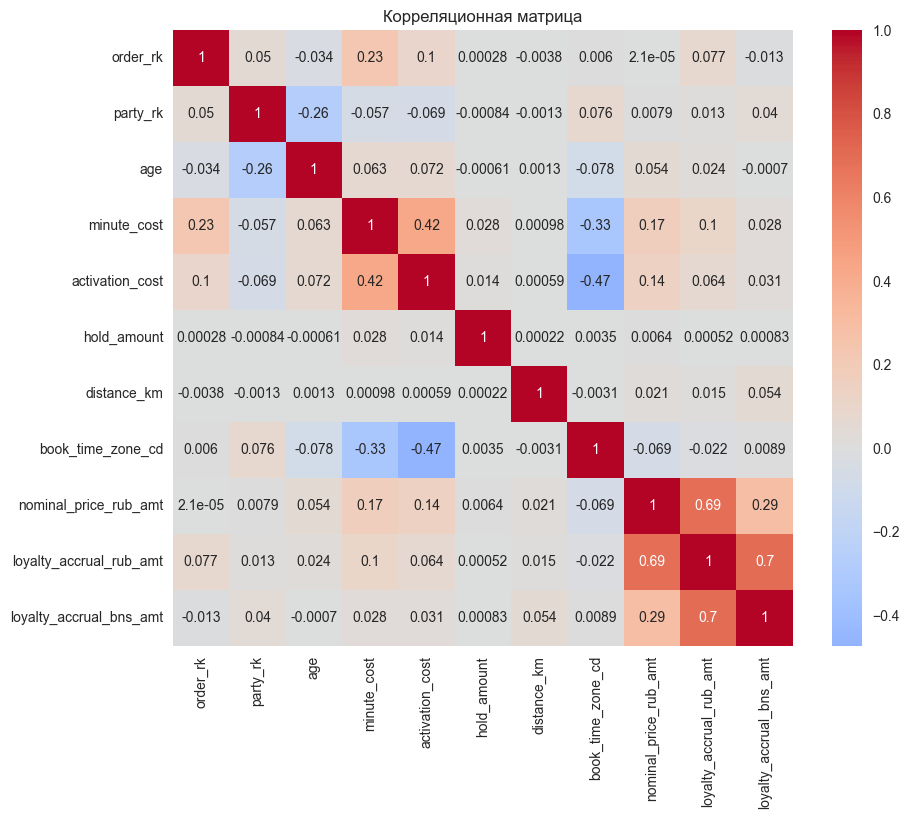

In [140]:
correlation_matrix = df.corr(numeric_only=True)

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

Не особо интересная тепловая карта

In [141]:
# Вывод доли пропусков в процентах для каждого столбца
df.isnull().mean().sort_values(ascending=False) * 100

loyalty_accrual_bns_amt    94.468039
education_level_cd         52.095910
marital_status_cd          45.121727
lvn_state_nm                8.614262
loyalty_accrual_rub_amt     7.500208
gender_cd                   0.736234
created_dttm                0.000000
nominal_price_rub_amt       0.000000
local_book_start_dttm       0.000000
book_time_zone_cd           0.000000
book_end_dttm               0.000000
book_start_dttm             0.000000
order_rk                    0.000000
distance_km                 0.000000
party_rk                    0.000000
hold_amount                 0.000000
activation_cost             0.000000
minute_cost                 0.000000
age                         0.000000
transport_model             0.000000
dtype: float64

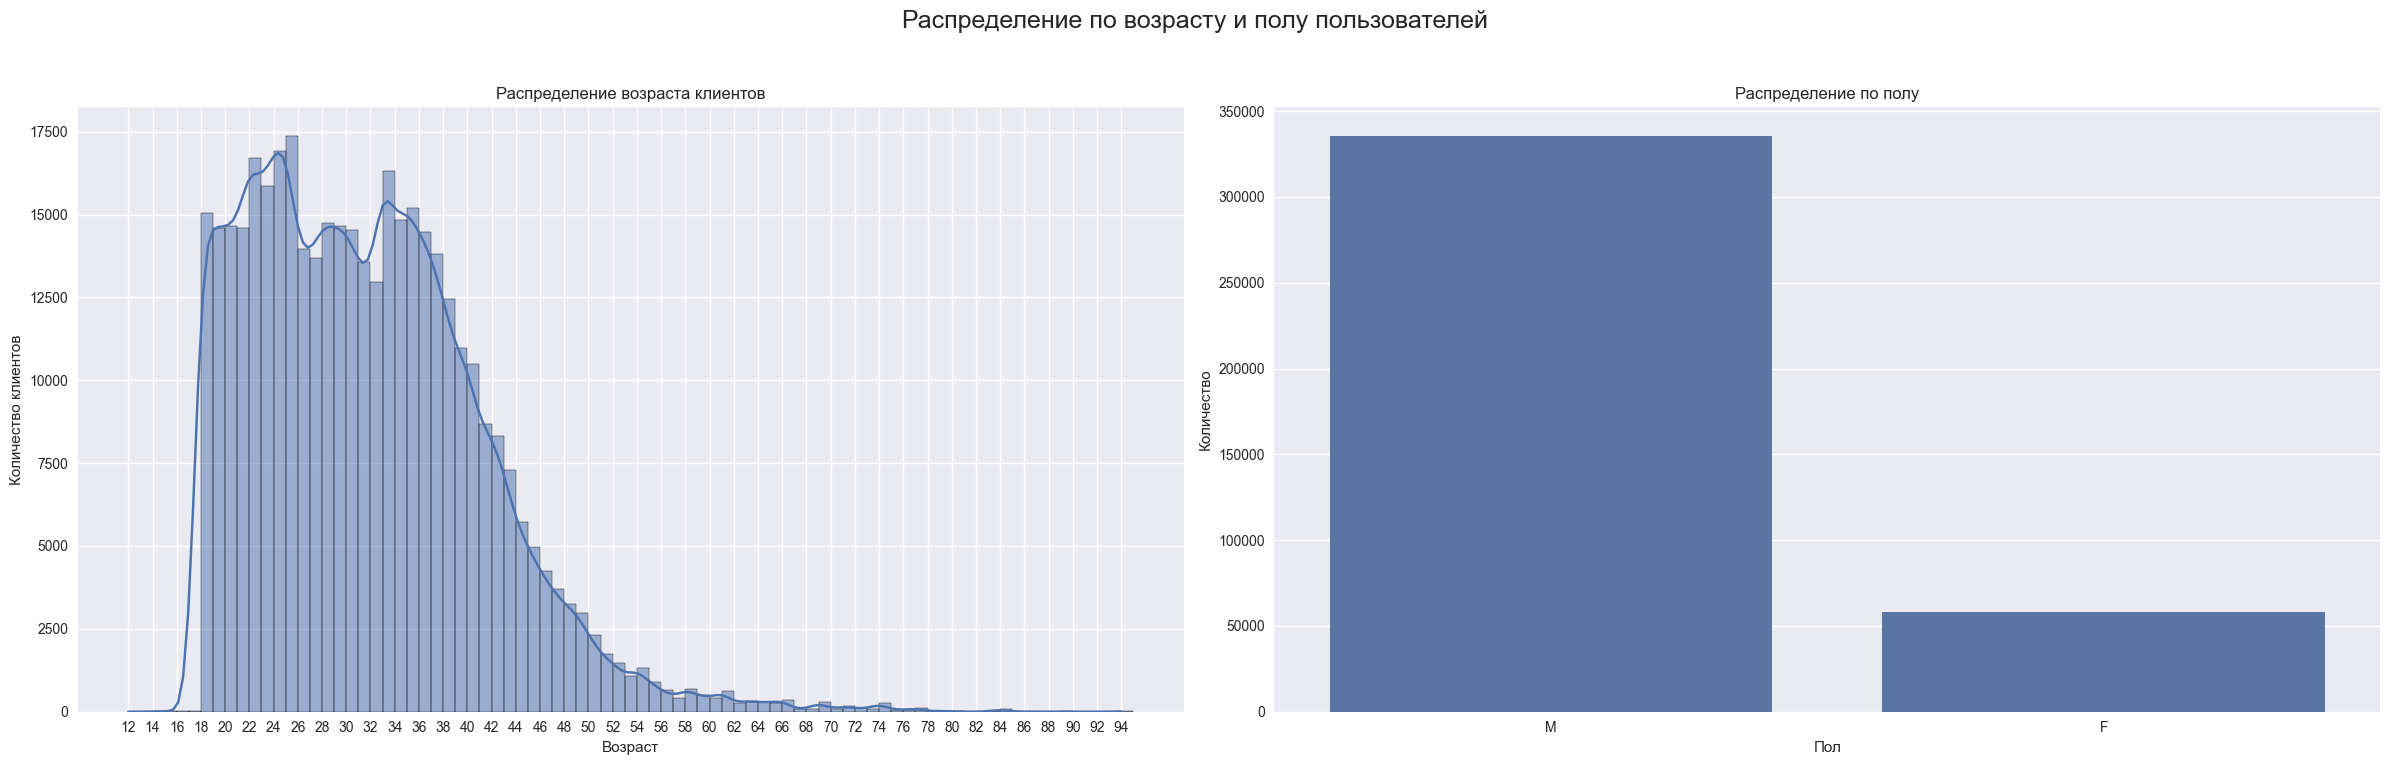

In [142]:
# Создаем фигуру с 2 подграфиками
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
fig.suptitle('Распределение по возрасту и полу пользователей', fontsize=18)

# Гистограмма возраста
min_age = df['age'].min()
max_age = df['age'].max()
sns.histplot(data=df, x='age', bins=range(min_age, max_age + 2), kde=True, ax=axes[0])
axes[0].set_xticks(range(min_age, max_age + 1, 2))
axes[0].set_title('Распределение возраста клиентов')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество клиентов')

# Распределение по полу
sns.barplot(x=df['gender_cd'].value_counts().index,
            y=df['gender_cd'].value_counts().values, ax=axes[1])
axes[1].set_title('Распределение по полу')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Количество')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # подгоняем отступы под заголовок
plt.show()

In [143]:
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['month'] = df['book_start_dttm'].dt.month
df['weekday'] = df['book_start_dttm'].dt.day_name()
df['hour'] = df['book_start_dttm'].dt.hour

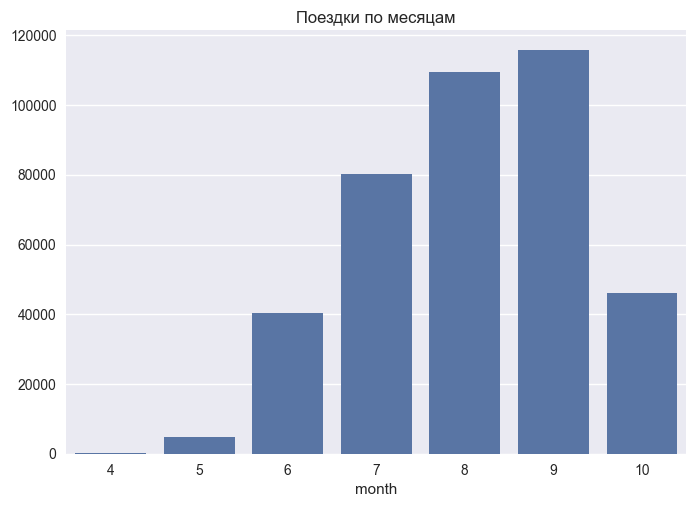

In [144]:
# Поездки по месяцам

sns.barplot(x=df['month'].value_counts().sort_index().index,
             y=df['month'].value_counts().sort_index().values)
plt.title('Поездки по месяцам')
plt.show()

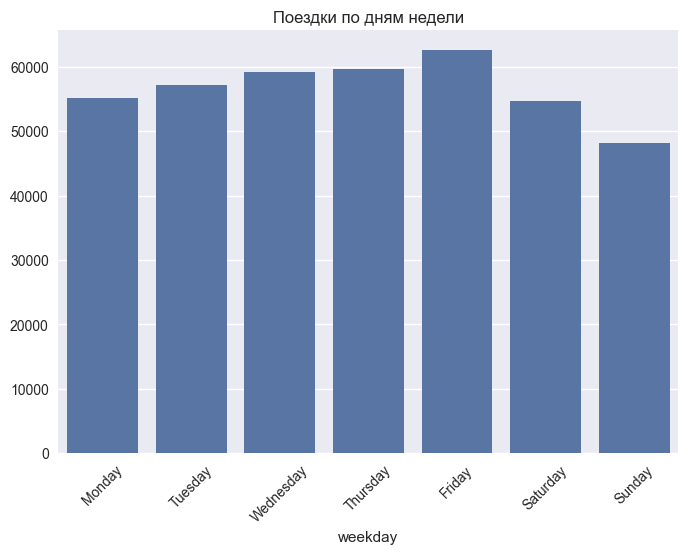

In [145]:
# Поездки по дням недели

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=df['weekday'].value_counts().reindex(weekday_order).index,
            y=df['weekday'].value_counts().reindex(weekday_order).values)
plt.xticks(rotation=45)
plt.title('Поездки по дням недели')
plt.show()

In [146]:
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])
df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])

# Вычисление длительности поездки
df['duration_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60

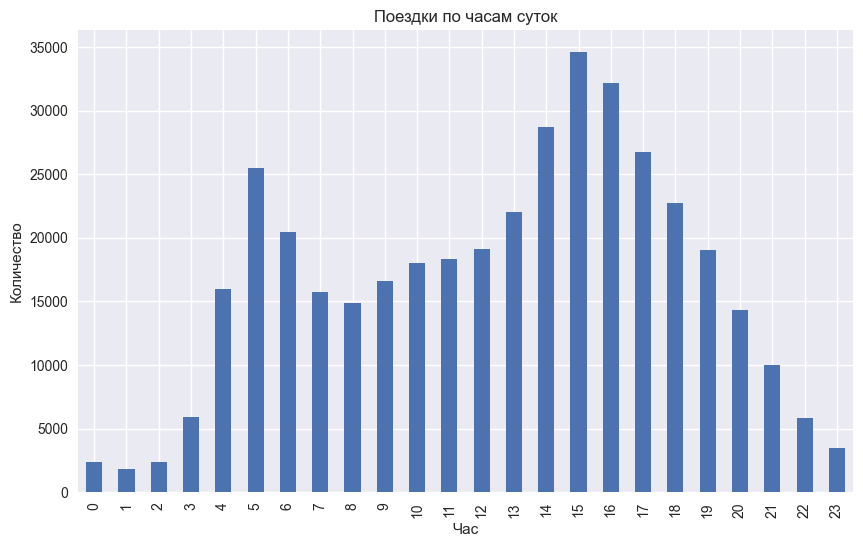

In [147]:
# Поездки по часам суток

df['hour'] = df['local_book_start_dttm'].dt.hour
rides_by_hour = df.groupby('hour').size()

plt.figure(figsize=(10, 6))
rides_by_hour.plot(kind='bar')
plt.title('Поездки по часам суток')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

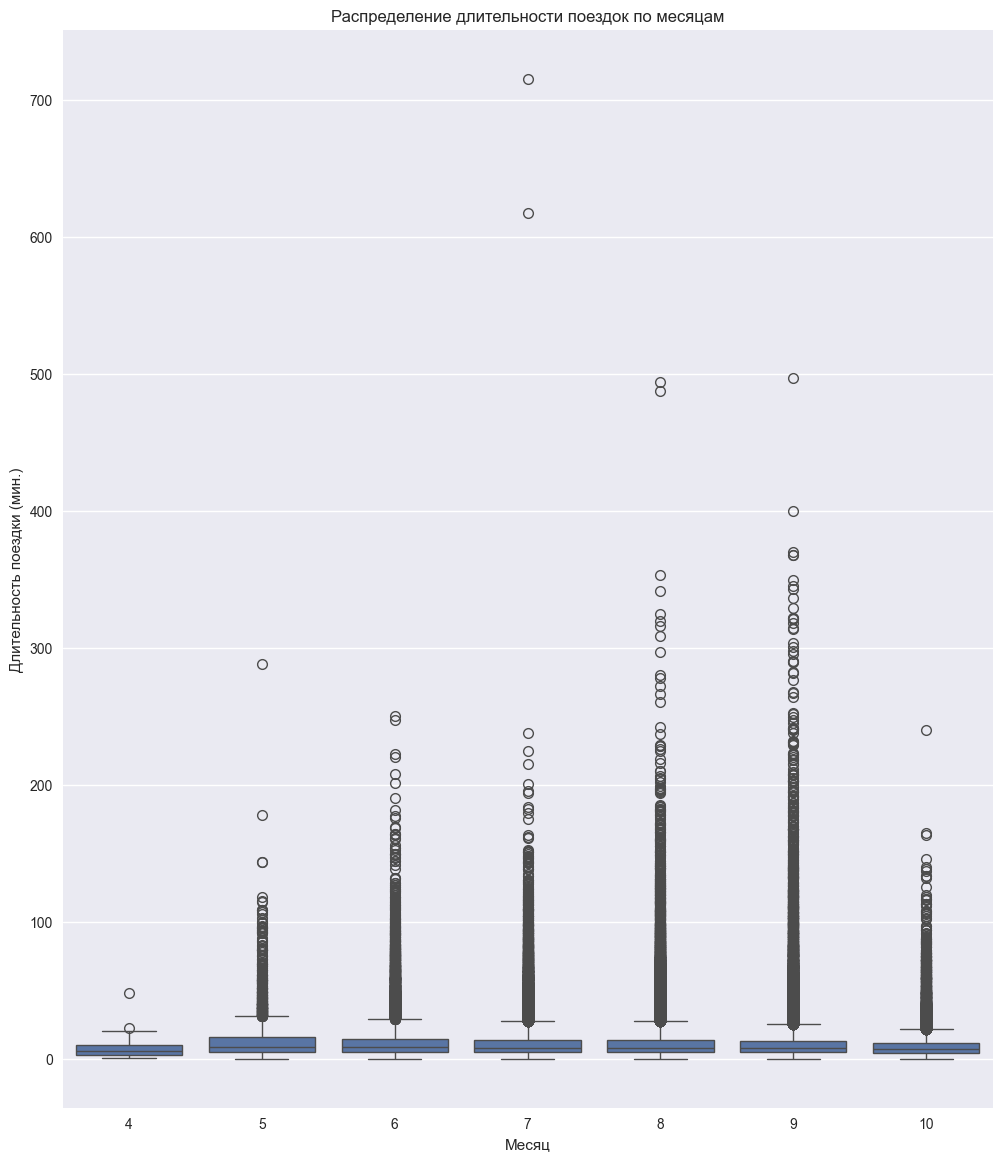

In [148]:
# Убедимся, что дата начала поездки уже в формате datetime
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])

# Выделим месяц в отдельный столбец, если ещё не выделен
df['month'] = df['book_start_dttm'].dt.month

# Вычислим длительность поездки в минутах, если ещё не вычислено
df['duration_min'] = (pd.to_datetime(df['book_end_dttm']) - pd.to_datetime(df['book_start_dttm'])).dt.total_seconds() / 60

# Строим boxplot длительности по месяцам
plt.figure(figsize=(12, 14))
sns.boxplot(x='month', y='duration_min', data=df)
plt.title('Распределение длительности поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Длительность поездки (мин.)')
plt.show()

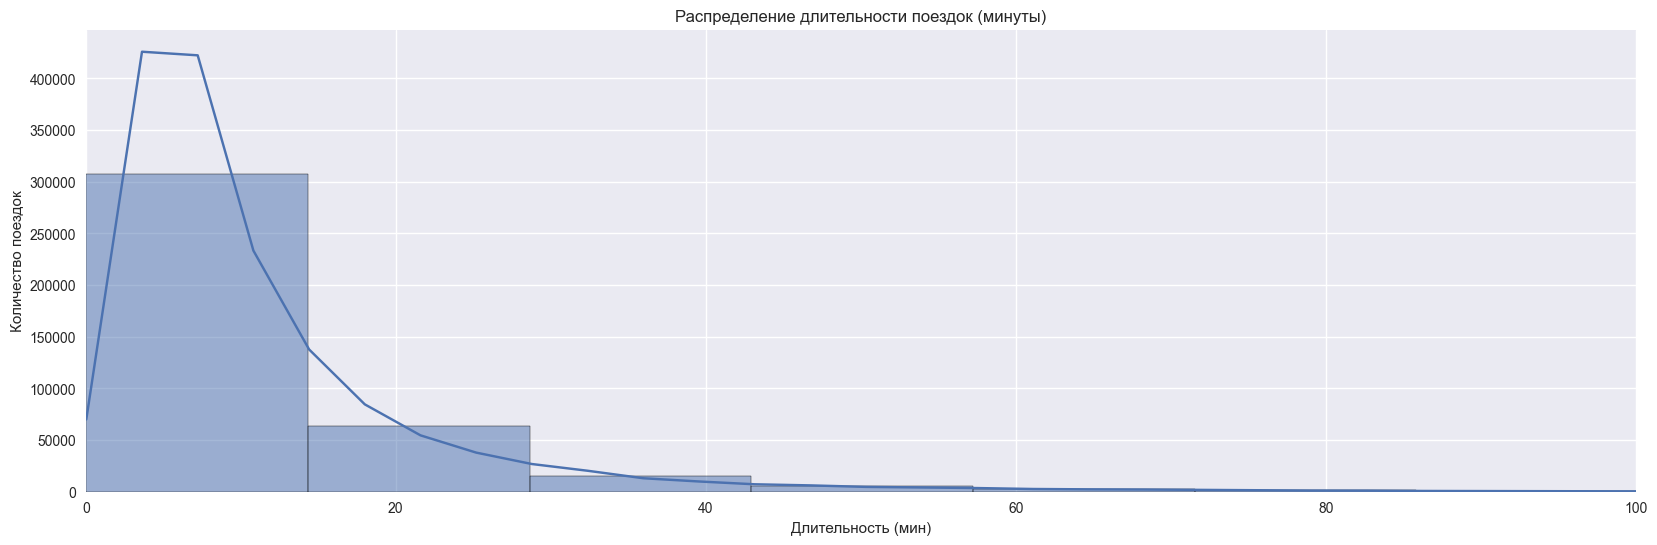

Медианная длительность: 7.8 мин
Средняя длительность поездки: 11.4 мин


In [149]:
# Распределение длительности поездки

plt.figure(figsize=(20, 6))
sns.histplot(df['duration_min'], bins=50, kde=True)
plt.title('Распределение длительности поездок (минуты)')
plt.xlabel('Длительность (мин)')
plt.ylabel('Количество поездок')
plt.xlim(0, 100)  # Ограничение для наглядности
plt.show()

# Медианное значение
print(f"Медианная длительность: {df['duration_min'].median():.1f} мин")
print(f"Средняя длительность поездки: {df['duration_min'].mean():.1f} мин")

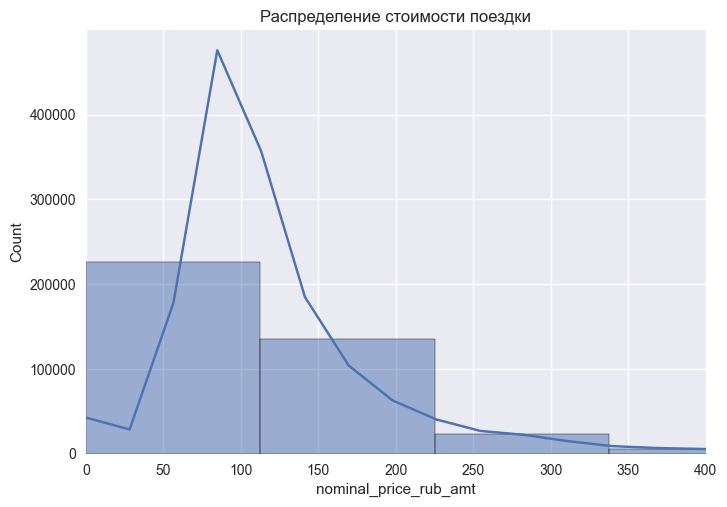

Медианная стоимость: 103.9 руб
Средняя стоимость: 127.6 руб


In [150]:
# Распределение стоимости поездки

sns.histplot(df['nominal_price_rub_amt'], bins=50, kde=True)
plt.xlim(0, 400)
plt.title('Распределение стоимости поездки')
plt.show()

# Медианное значение
print(f"Медианная стоимость: {df['nominal_price_rub_amt'].median():.1f} руб")
print(f"Средняя стоимость: {df['nominal_price_rub_amt'].mean():.1f} руб")

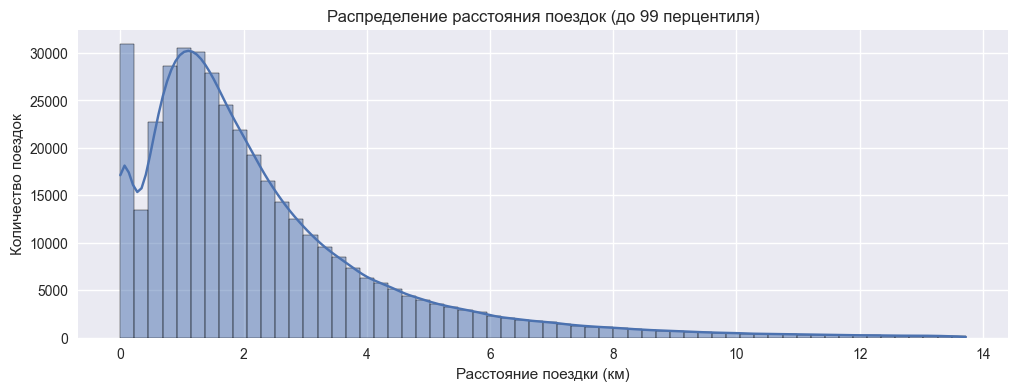

Среднее расстояние: 3.68 км
Медианное расстояние: 1.73 км
99-й перцентиль: 13.72 км


In [151]:
# Обрезаем редкие экстремальные значения
filtered_dist = df[df['distance_km'] <= df['distance_km'].quantile(0.99)]

plt.figure(figsize=(12, 4))
sns.histplot(filtered_dist['distance_km'], bins=60, kde=True)
plt.title('Распределение расстояния поездок (до 99 перцентиля)')
plt.xlabel('Расстояние поездки (км)')
plt.ylabel('Количество поездок')
plt.show()

# Статистика по всей выборке
print(f"Среднее расстояние: {df['distance_km'].mean():.2f} км")
print(f"Медианное расстояние: {df['distance_km'].median():.2f} км")
print(f"99-й перцентиль: {df['distance_km'].quantile(0.99):.2f} км")

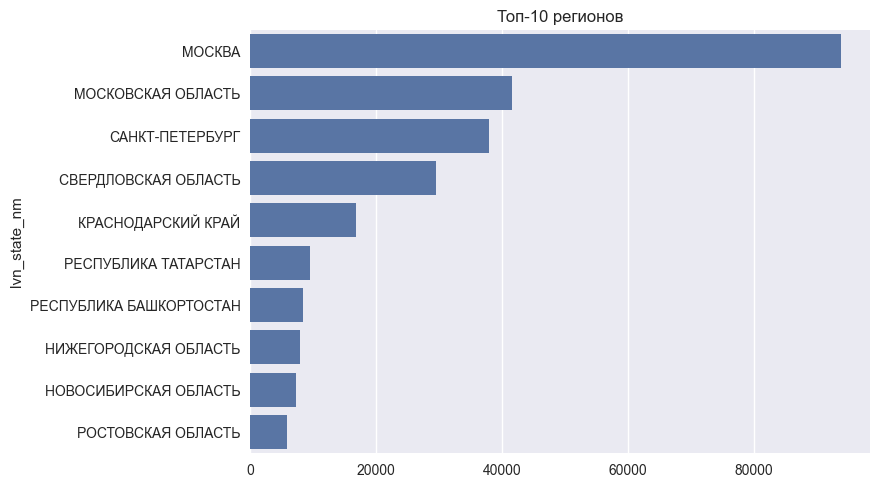

In [152]:
# Топ 10 регионов

top_regions = df['lvn_state_nm'].value_counts().head(10)
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Топ-10 регионов')
plt.show()

In [153]:
# Вывод информации о моедлях самокатов и их количестве

df['transport_model'].value_counts()

transport_model
SL              241247
Max              70301
E                67666
Urban E-Bike      4704
ES400             4152
ES200             3325
ES100             2829
MK                1054
ES-08S             911
Techno             228
ES                 119
LB                 115
Lucky               62
B1D                 36
Name: count, dtype: int64

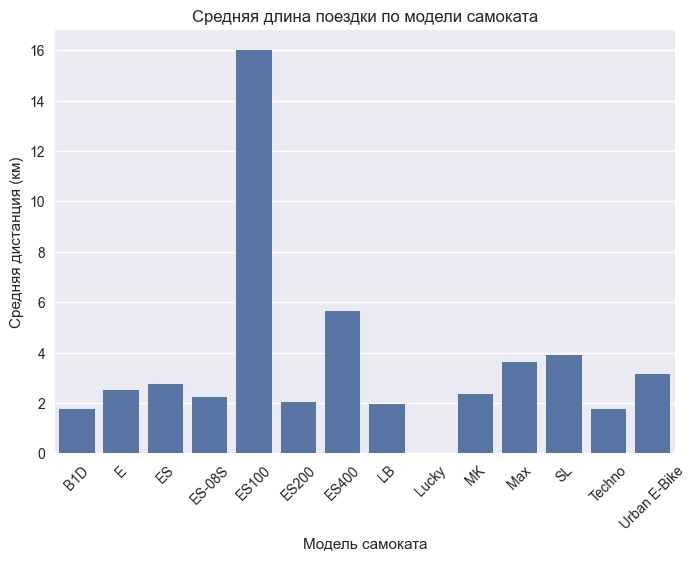

In [154]:
#Средняя длина поездки по модели самоката
# Фильтруем пропущенные значения
model_distance_df = df.dropna(subset=['transport_model', 'distance_km'])

# Средняя дистанция поездки по модели
model_distance = model_distance_df.groupby('transport_model')['distance_km'].mean().reset_index()
model_distance.rename(columns={'distance_km': 'avg_distance_km'}, inplace=True)

sns.barplot(data=model_distance, x='transport_model', y='avg_distance_km')
plt.title('Средняя длина поездки по модели самоката')
plt.xlabel('Модель самоката')
plt.ylabel('Средняя дистанция (км)')
plt.xticks(rotation=45)
plt.show()

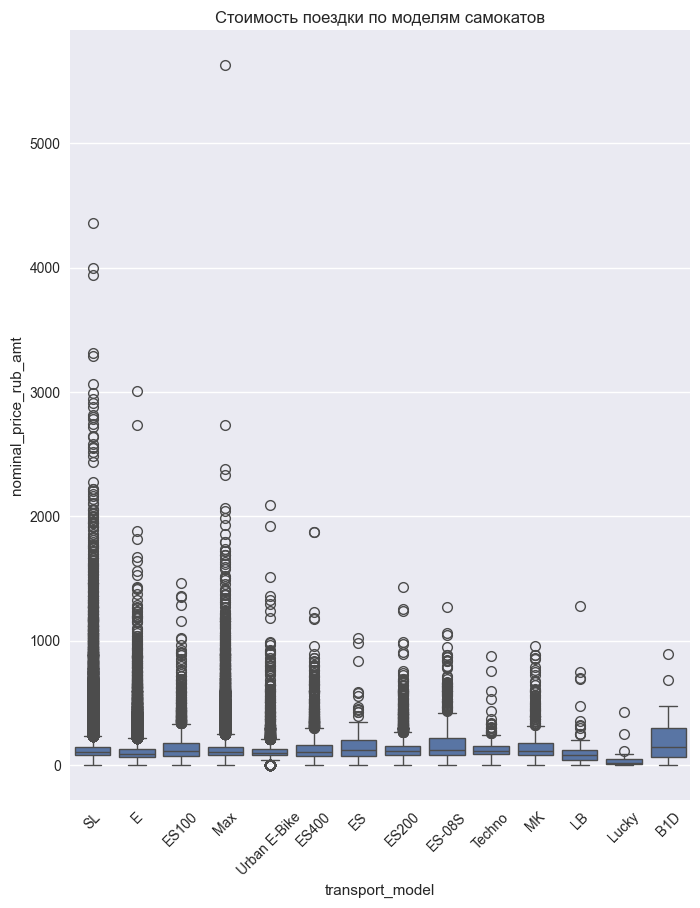

In [155]:
# Стоимость поездки по моделям самоката

plt.figure(figsize=(8, 10))
sns.boxplot(x='transport_model', y='nominal_price_rub_amt', data=df)
plt.title('Стоимость поездки по моделям самокатов')
plt.xticks(rotation=45)
plt.show()

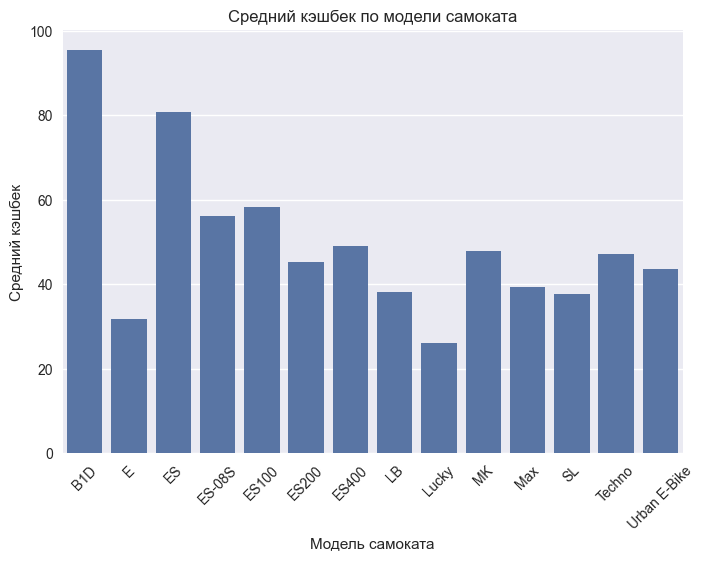

In [156]:
# Средний кэшбэк по модели самоката
# Фильтруем пропущенные значения
model_cashback_df = df.dropna(subset=['transport_model', 'loyalty_accrual_rub_amt'])

# Группировка и средний кэшбек по модели
model_cashback = model_cashback_df.groupby('transport_model')['loyalty_accrual_rub_amt'].mean().reset_index()
model_cashback.rename(columns={'loyalty_accrual_rub_amt': 'avg_cashback'}, inplace=True)

sns.barplot(data=model_cashback, x='transport_model', y='avg_cashback')
plt.title('Средний кэшбек по модели самоката')
plt.xlabel('Модель самоката')
plt.ylabel('Средний кэшбек')
plt.xticks(rotation=45)
plt.show()

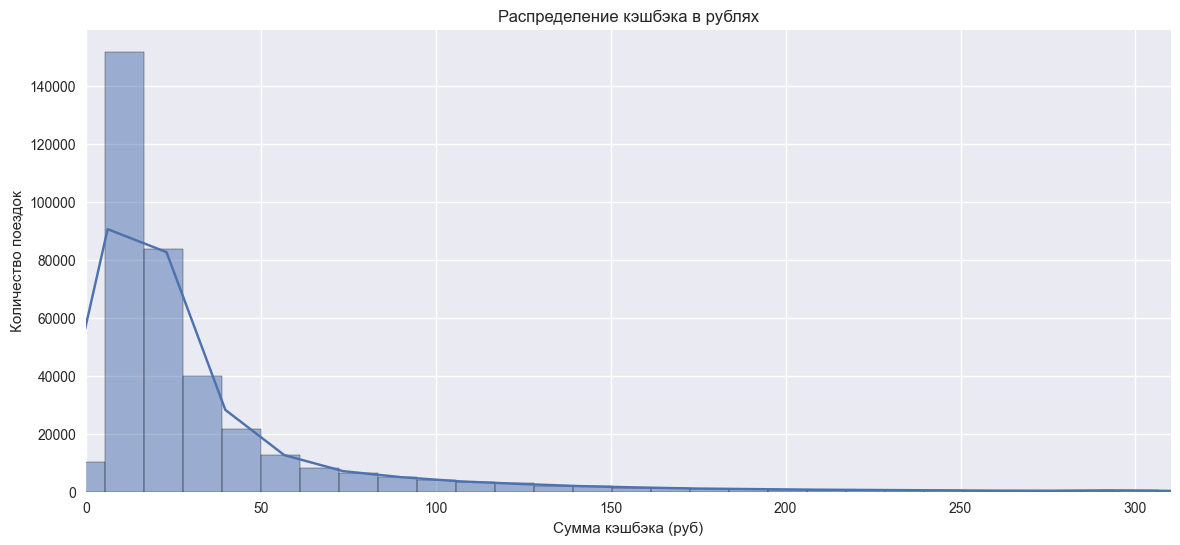

In [157]:
# Распределение кэшбэка в рублях

plt.figure(figsize=(14, 6))  # увеличим ширину
sns.histplot(df['loyalty_accrual_rub_amt'], bins=300, kde=True)  # меньше, но всё ещё достаточно
plt.title('Распределение кэшбэка в рублях')
plt.xlabel('Сумма кэшбэка (руб)')
plt.ylabel('Количество поездок')
plt.xlim(0, df['loyalty_accrual_rub_amt'].quantile(0.99))  # отрежем выбросы справа
plt.show()

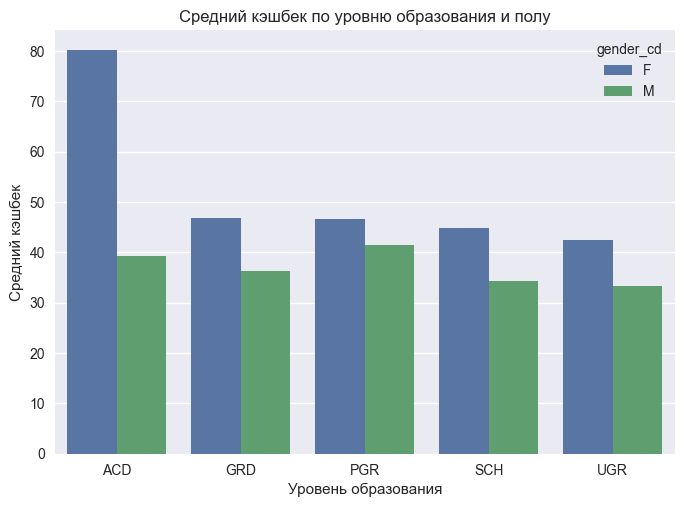

In [158]:
# Фильтруем пропущенные значения
cashback_df = df.dropna(subset=['education_level_cd', 'gender_cd', 'loyalty_accrual_rub_amt'])

# Группировка и средний кэшбек
cashback_group = cashback_df.groupby(['education_level_cd', 'gender_cd'])['loyalty_accrual_rub_amt'].mean().reset_index()
cashback_group.rename(columns={'loyalty_accrual_rub_amt': 'avg_cashback'}, inplace=True)

# Визуализация
sns.barplot(data=cashback_group, x='education_level_cd', y='avg_cashback', hue='gender_cd')
plt.title('Средний кэшбек по уровню образования и полу')
plt.xlabel('Уровень образования')
plt.ylabel('Средний кэшбек')
plt.show()

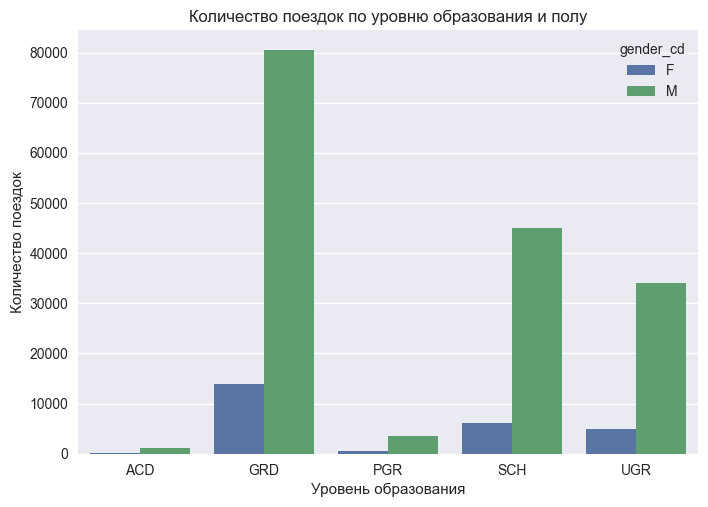

In [159]:
# Анализ зависимости количества поездок от уровня образования и пола

# Фильтруем пропущенные значения
edu_gender_df = df.dropna(subset=['education_level_cd', 'gender_cd'])

# Группируем по образованию и полу, считаем количество поездок
edu_gender_counts = edu_gender_df.groupby(['education_level_cd', 'gender_cd'])['order_rk'].count().reset_index()
edu_gender_counts.rename(columns={'order_rk': 'trip_count'}, inplace=True)

sns.barplot(data=edu_gender_counts, x='education_level_cd', y='trip_count', hue='gender_cd')
plt.title('Количество поездок по уровню образования и полу')
plt.xlabel('Уровень образования')
plt.ylabel('Количество поездок')
plt.show()

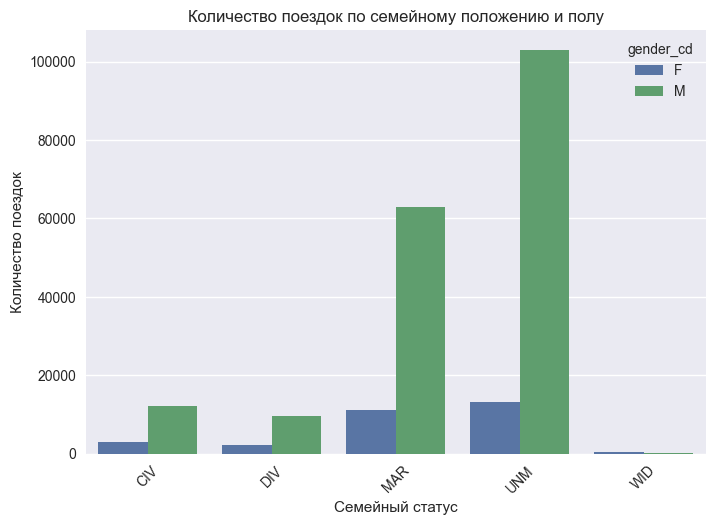

In [160]:
# Анализ зависимости количества поездок от семейного положения и пола

# Фильтруем пропущенные значения
marital_gender_df = df.dropna(subset=['marital_status_cd', 'gender_cd'])

# Группируем по семейному статусу и полу
marital_gender_counts = marital_gender_df.groupby(['marital_status_cd', 'gender_cd'])['order_rk'].count().reset_index()
marital_gender_counts.rename(columns={'order_rk': 'trip_count'}, inplace=True)

sns.barplot(data=marital_gender_counts, x='marital_status_cd', y='trip_count', hue='gender_cd')
plt.title('Количество поездок по семейному положению и полу')
plt.xlabel('Семейный статус')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.show()

# На этом этапе разведочный анализ данных (EDA) закончен.
В процессе формирования гипотез было множество идей, и одну из них я считаю самой перспективной, ее я хочу показать отдельно в данном файле.

Изначально была гипотеза "старый друг лучше новых двух", то есть что пользователей с двумя и более поездками выгоднее стимулировать, чем совсем новых.

Так и оказалось. Я хотел рассчитать LTV, но пока результаты не очень удачными, поэтому переключил внимание на анализ выручки и обнаружил интересные закономерности.

In [161]:
user_stats = df.groupby('party_rk').agg(
    rides_count=('order_rk', 'count'),
    revenue_sum=('nominal_price_rub_amt', 'sum')
).reset_index()

# Общая выручка и количество пользователей
total_revenue = user_stats['revenue_sum'].sum()
total_users = user_stats.shape[0]

# Фильтруем пользователей по числу поездок
one_ride_users = user_stats[user_stats['rides_count'] == 1]
multi_ride_users = user_stats[user_stats['rides_count'] >= 2]

# Считаем выручку от каждой группы
revenue_one_ride = one_ride_users['revenue_sum'].sum()
revenue_multi_ride = multi_ride_users['revenue_sum'].sum()

# Процент выручки от каждой группы
pct_revenue_one_ride = revenue_one_ride / total_revenue * 100
pct_revenue_multi_ride = revenue_multi_ride / total_revenue * 100

# Количество пользователей в каждой группе
count_one_ride = one_ride_users.shape[0]
count_multi_ride = multi_ride_users.shape[0]

# Процент пользователей в каждой группе
pct_users_one_ride = count_one_ride / total_users * 100
pct_users_multi_ride = count_multi_ride / total_users * 100

# Вывод результатов
print(f"Выручка от пользователей с 1 поездкой: {pct_revenue_one_ride:.2f}%")
print(f"Выручка от пользователей с 2+ поездками: {pct_revenue_multi_ride:.2f}%")
print(f"Доля пользователей с 1 поездкой: {pct_users_one_ride:.2f}%")
print(f"Доля пользователей с 2+ поездками: {pct_users_multi_ride:.2f}%")

Выручка от пользователей с 1 поездкой: 9.96%
Выручка от пользователей с 2+ поездками: 90.04%
Доля пользователей с 1 поездкой: 40.63%
Доля пользователей с 2+ поездками: 59.37%


Я попробовал изучить группу пользователей с одной поездкой, но не обнаружил никаких существенных общих признаков и переключился на вторую группу. Решил, что было бы интересно посмотреть, как соотносятся самые активные пользователи этой группы и выручка.

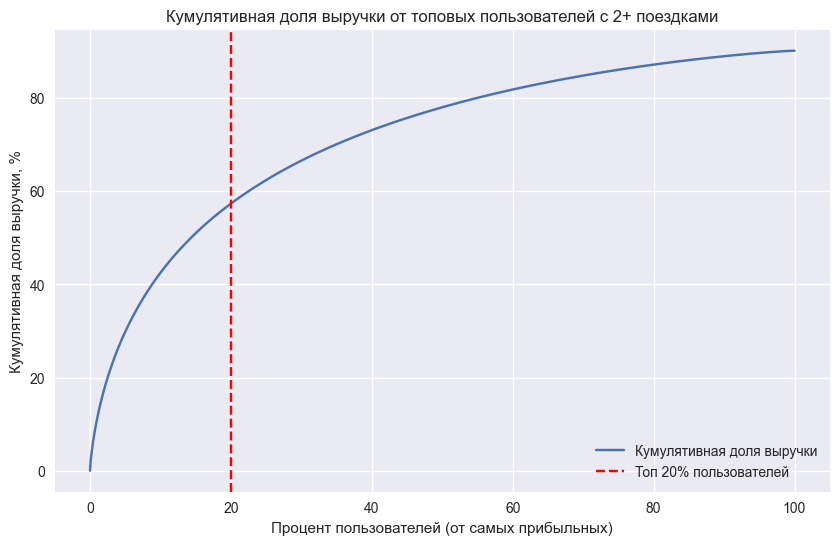

In [162]:
# Сортируем по убыванию выручки
users_2 = multi_ride_users.sort_values(by='revenue_sum', ascending=False).reset_index(drop=True)

# Кумулятивная сумма выручки
users_2['cum_revenue'] = users_2['revenue_sum'].cumsum()

# Кумулятивная доля выручки от общей выручки (в процентах)
users_2['cum_revenue_share'] = users_2['cum_revenue'] / total_revenue * 100

# Процент пользователей по ранжированию
users_2['user_pct'] = (users_2.index + 1) / len(users_2) * 100

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(users_2['user_pct'], users_2['cum_revenue_share'], label='Кумулятивная доля выручки')
plt.axvline(x=20, color='red', linestyle='--', label='Топ 20% пользователей')
plt.xlabel('Процент пользователей (от самых прибыльных)')
plt.ylabel('Кумулятивная доля выручки, %')
plt.title('Кумулятивная доля выручки от топовых пользователей с 2+ поездками')
plt.legend()
plt.grid(True)
plt.show()


In [163]:
top_percents = [20, 30, 40, 50, 60, 70, 80, 90, 100]

print(f"Общая выручка всех пользователей: {total_revenue:.2f} руб.")
print(f"Всего пользователей с 2+ поездками: {len(users_2)}")

for p in top_percents:
    rev_up_to_p = users_2[users_2['user_pct'] <= p]['cum_revenue_share'].iloc[-1]
    print(f"Доля выручки от топ-{p}% пользователей: {rev_up_to_p:.2f}%")


Общая выручка всех пользователей: 50644095.02 руб.
Всего пользователей с 2+ поездками: 38029
Доля выручки от топ-20% пользователей: 57.30%
Доля выручки от топ-30% пользователей: 66.51%
Доля выручки от топ-40% пользователей: 73.03%
Доля выручки от топ-50% пользователей: 77.93%
Доля выручки от топ-60% пользователей: 81.73%
Доля выручки от топ-70% пользователей: 84.72%
Доля выручки от топ-80% пользователей: 87.07%
Доля выручки от топ-90% пользователей: 88.86%
Доля выручки от топ-100% пользователей: 90.04%


Получается практически принцип Парето, но немного не хватает процентов. Посмотрим сравнение по группам, и после этого можно будет сформулировать гипотезу.

In [164]:
first_ride_dates = df.groupby('party_rk')['created_dttm'].min().reset_index().rename(columns={'created_dttm': 'first_ride_date'})

# Объединяем с multi_ride_users
user_analysis = multi_ride_users.merge(first_ride_dates, on='party_rk', how='left')

# Средняя стоимость поездки
user_analysis['avg_ride_cost'] = user_analysis['revenue_sum'] / user_analysis['rides_count']

# Преобразуем к datetime и считаем возраст пользователя
user_analysis['first_ride_date'] = pd.to_datetime(user_analysis['first_ride_date'])
current_date = pd.to_datetime('today')
user_analysis['days_since_first_ride'] = (current_date - user_analysis['first_ride_date']).dt.days

# Добавляем столбец с процентилями пользователей для разбиения на группы
user_analysis = user_analysis.sort_values(by='revenue_sum', ascending=False).reset_index(drop=True)
user_analysis['user_pct'] = (user_analysis.index + 1) / len(user_analysis) * 100

bins = [0, 20, 40, 60, 100]
labels = ['Top-20%', '20-40%', '40-60%', '60-100%']
user_analysis['percentile_group'] = pd.cut(user_analysis['user_pct'], bins=bins, labels=labels, include_lowest=True)

# Рассчитываем средние метрики по группам
group_stats = user_analysis.groupby('percentile_group').agg({
    'rides_count': 'mean',
    'revenue_sum': 'mean',
    'avg_ride_cost': 'mean',
    'party_rk': 'count',
    'days_since_first_ride': 'mean'
}).rename(columns={
    'rides_count': 'avg_rides',
    'revenue_sum': 'avg_revenue',
    'avg_ride_cost': 'avg_ride_price',
    'party_rk': 'user_count',
    'days_since_first_ride': 'avg_days_since_first_ride'
}).round(2)

# Доля выручки каждой группы от общей выручки
group_revenue_share = user_analysis.groupby('percentile_group')['revenue_sum'].sum() / total_revenue * 100
group_stats['revenue_share'] = group_revenue_share.round(2)

# Средняя интенсивность поездок — поездок в день
user_analysis['rides_per_day'] = user_analysis['rides_count'] / user_analysis['days_since_first_ride']
usage_stats = user_analysis.groupby('percentile_group')['rides_per_day'].mean().round(3)
group_stats['avg_rides_per_day'] = usage_stats

# Итоговый вывод
print("Сравнение групп")
print(group_stats)

print("Средняя интенсивность поездок")
print(user_analysis.groupby('percentile_group')['rides_per_day'].mean().round(3))

Сравнение групп
                  avg_rides  avg_revenue  avg_ride_price  user_count  \
percentile_group                                                       
Top-20%               31.21      3815.71          146.89        7605   
20-40%                 7.90      1047.47          166.37        7606   
40-60%                 4.39       579.55          156.75        7606   
60-100%                2.62       276.50          110.94       15212   

                  avg_days_since_first_ride  revenue_share  avg_rides_per_day  
percentile_group                                                               
Top-20%                              407.27          57.30              0.076  
20-40%                               394.13          15.73              0.020  
40-60%                               387.00           8.70              0.011  
60-100%                              383.16           8.31              0.007  
Средняя интенсивность поездок
percentile_group
Top-20%    0.076
20-40% 

In [165]:
# Создаём колонку user_pct, если её нет
multi_ride_users = multi_ride_users.sort_values(by='revenue_sum', ascending=False).reset_index(drop=True)
multi_ride_users['user_pct'] = (multi_ride_users.index + 1) / len(multi_ride_users) * 100

# Выбираем топ-20% пользователей
top_20_users = multi_ride_users[multi_ride_users['user_pct'] <= 20]

# Выбираем пользователей с 20-80 процентили (т.е. низшая 20% по выручке из активных)
top_20_80_users = multi_ride_users[(multi_ride_users['user_pct'] > 20) & (multi_ride_users['user_pct'] <= 100)]

top_20_detailed = top_20_users.merge(df[['party_rk', 'age', 'education_level_cd']], on='party_rk', how='left')
top_20_80_detailed = top_20_80_users.merge(df[['party_rk', 'age', 'education_level_cd']], on='party_rk', how='left')

# Считаем статистику по возрасту
age_stats_top_20 = top_20_detailed['age'].describe()
age_stats_20_80 = top_20_80_detailed['age'].describe()

# Распределение по уровню образования в процентах
education_counts_top_20 = top_20_detailed['education_level_cd'].value_counts(normalize=True) * 100
education_counts_20_80 = top_20_80_detailed['education_level_cd'].value_counts(normalize=True) * 100

In [166]:
print("Статистика по возрасту топ-20% пользователей:")
print(age_stats_top_20)
print("\nРаспределение уровней образования топ-20% пользователей (в %):")
print(education_counts_top_20.round(2))

Статистика по возрасту топ-20% пользователей:
count    237316.000000
mean         31.471797
std           9.439375
min          18.000000
25%          24.000000
50%          30.000000
75%          37.000000
max          94.000000
Name: age, dtype: float64

Распределение уровней образования топ-20% пользователей (в %):
education_level_cd
GRD    49.51
SCH    26.68
UGR    21.09
PGR     2.08
ACD     0.64
Name: proportion, dtype: float64


In [167]:
print("\nСтатистика по возрасту пользователей с 20-80%:")
print(age_stats_20_80)
print("\nРаспределение уровней образования пользователей с 20-80% (в %):")
print(education_counts_20_80.round(2))


Статистика по возрасту пользователей с 20-80%:
count    133410.000000
mean         31.510831
std           9.324331
min          14.000000
25%          24.000000
50%          31.000000
75%          38.000000
max          89.000000
Name: age, dtype: float64

Распределение уровней образования пользователей с 20-80% (в %):
education_level_cd
GRD    49.62
SCH    27.39
UGR    19.78
PGR     2.42
ACD     0.79
Name: proportion, dtype: float64


По данным видно, что в целом значения для групп 20-40, 40-60 и 60-100 примерно кратны двум, а вот у топ-20 показатели по выручке и интенсивности поездок значительно выше. При этом средняя цена поездки у топ-20 чуть ниже. Я отдельно проверил разбивку на группы 20-40, 20-80, 40-60, 60-80, 80-100 средние данные примерно одинаковы, разница между значениями в группах минимальна, что позволяет предположить, что большая часть пользователей с 2+ поездками имеет похожие характеристики. Получается, что у топ-20 сформировалась привычка кататься регулярно, а у всех остальных — скорее ситуативное, нерегулярное использование сервиса. На мой взгляд, стоит рассмотреть идею создания устойчивой привычки пользоваться самокатами у пользователей из сегментов 20-100, но нацелиться на 20-80%.